# Import Libraries 

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
unstructure_data=pd.read_excel('Artificial_Data.xlsx')
unstructure_data.head(2)

,RATING_TYPE,Rating,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,string_values
0,Fitch,A+,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,...,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648,"Challenges remain in the supply chain, but str..."
1,Moody's,BB,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,...,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653,The company reported a steady increase in reve...


## Text Preprocesssing

In [3]:
unstructure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 154 entries, RATING_TYPE to string_values
dtypes: float64(151), object(3)
memory usage: 120.4+ KB


In [4]:
unstructure_data['RATING_TYPE'].unique()

array(['Fitch', "Moody's", 'S&P'], dtype=object)

### AAA: Highest rating, indicating a very low risk of default.

AA+: Very high quality, just below AAA.

AA: High quality, still very low risk of default.

AA-: Slightly lower than AA but still in the upper category.

A+: Strong capacity to meet obligations, but somewhat more risk than AA ratings.

A: More risk than AA ratings, but still a solid investment grade.

BBB+: Lower end of investment grade, still capable of meeting obligations but more vulnerable to economic changes.

BBB: Lowest investment-grade rating, still considered capable of meeting financial obligations but with more significant risks.

BB: Below investment grade, indicating higher risk, and considered a "speculative" rating.

In [5]:
unstructure_data['Rating'].unique()

array(['A+', 'BB', 'BBB', 'AA', 'AAA', 'A', 'AA+', 'BBB+'], dtype=object)

In [6]:
unstructure_data=unstructure_data[['string_values','RATING_TYPE','Rating']]
unstructure_data.head()

,string_values,RATING_TYPE,Rating
0,"Challenges remain in the supply chain, but str...",Fitch,A+
1,The company reported a steady increase in reve...,Moody's,BB
2,The company reported a steady increase in reve...,Fitch,BB
3,The company reported a steady increase in reve...,Fitch,BBB
4,The company reported a steady increase in reve...,Moody's,AA


### function to clean text

In [7]:
# Download stopwords from nltk (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
import warnings

# Initialize the necessary tools for preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# nlp = spacy.load("en_core_web_sm")  # spaCy for more advanced lemmatization

# Preprocess function
def preprocess_text(text, use_lemmatization=True, use_stemming=False):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization or stemming
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif use_stemming:
        tokens = [ps.stem(word) for word in tokens]
    
    # Return the cleaned text
    return " ".join(tokens)

# Apply preprocessing to the dataframe
unstructure_data['cleaned_string'] = unstructure_data['string_values'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Viky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Viky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
unstructure_data.columns

Index(['string_values', 'RATING_TYPE', 'Rating', 'cleaned_string'], dtype='object')

In [32]:
unstructure_data=unstructure_data[['cleaned_string', 'Rating']]
unstructure_data.head()

,cleaned_string,Rating
0,challenge remain supply chain strategic invest...,A+
1,company reported steady increase revenue refle...,BB
2,company reported steady increase revenue refle...,BB
3,company reported steady increase revenue refle...,BBB
4,company reported steady increase revenue refle...,AA


## using textblob for sentiment Analysis
TextBlob gives us a polarity score between -1 (negative) and 1 (positive), and we can classify the sentiment accordingly.

In [33]:
from textblob import TextBlob
# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
unstructure_data['sentiment'] = unstructure_data['cleaned_string'].apply(get_sentiment)

# Display the resulting dataframe
unstructure_data


,cleaned_string,Rating,sentiment
0,challenge remain supply chain strategic invest...,A+,neutral
1,company reported steady increase revenue refle...,BB,positive
2,company reported steady increase revenue refle...,BB,positive
3,company reported steady increase revenue refle...,BBB,positive
4,company reported steady increase revenue refle...,AA,positive
...,...,...,...
95,outlook remains positive expected growth domes...,BBB+,positive
96,outlook remains positive expected growth domes...,AA,positive
97,challenge remain supply chain strategic invest...,BB,neutral
98,company reported steady increase revenue refle...,AA+,positive


In [34]:
unstructure_data['sentiment'].value_counts(normalize=True)

sentiment
positive    0.63
neutral     0.37
Name: proportion, dtype: float64

## Using Embedding models and bert model

In [35]:
with_bert=pd.read_excel('Artificial_Data.xlsx')
with_bert=with_bert[['string_values','Rating']]
with_bert.head(2)

,string_values,Rating
0,"Challenges remain in the supply chain, but str...",A+
1,The company reported a steady increase in reve...,BB


In [36]:
import pandas as pd
from transformers import pipeline

# Load pre-trained model and tokenizer from Hugging Face
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_analyzer = pipeline('sentiment-analysis', model=model_name, tokenizer=model_name)

Device set to use cpu


In [37]:
text=with_bert['string_values'].tolist()

In [38]:
# Get sentiment analysis results for all samples in the dataset
results = sentiment_analyzer(text)

# Print the results
for text, result in zip(text, results):
    print(f"Text: {text}")
    print(f"Sentiment: {result['label']} (Confidence: {result['score']:.4f})\n")


Text: Challenges remain in the supply chain, but strategic investments in logistics are improving efficiencies.
Sentiment: 3 stars (Confidence: 0.4615)

Text: The company reported a steady increase in revenue, reflecting strong market demand.
Sentiment: 5 stars (Confidence: 0.4906)

Text: The company reported a steady increase in revenue, reflecting strong market demand.
Sentiment: 5 stars (Confidence: 0.4906)

Text: The company reported a steady increase in revenue, reflecting strong market demand.
Sentiment: 5 stars (Confidence: 0.4906)

Text: The company reported a steady increase in revenue, reflecting strong market demand.
Sentiment: 5 stars (Confidence: 0.4906)

Text: The outlook remains positive, with expected growth in both domestic and international markets.
Sentiment: 4 stars (Confidence: 0.5228)

Text: The company reported a steady increase in revenue, reflecting strong market demand.
Sentiment: 5 stars (Confidence: 0.4906)

Text: Challenges remain in the supply chain, but s

In [41]:
sentiment_vs=pd.DataFrame(results)

In [42]:
sentiment_vs

,label,score
0,3 stars,0.461470
1,5 stars,0.490557
2,5 stars,0.490557
3,5 stars,0.490557
4,5 stars,0.490557
...,...,...
95,4 stars,0.522770
96,4 stars,0.522770
97,3 stars,0.461470
98,5 stars,0.490557


In [45]:
sentiment_vs['label'].value_counts(normalize=True)

label
5 stars    0.45
4 stars    0.32
3 stars    0.23
Name: proportion, dtype: float64

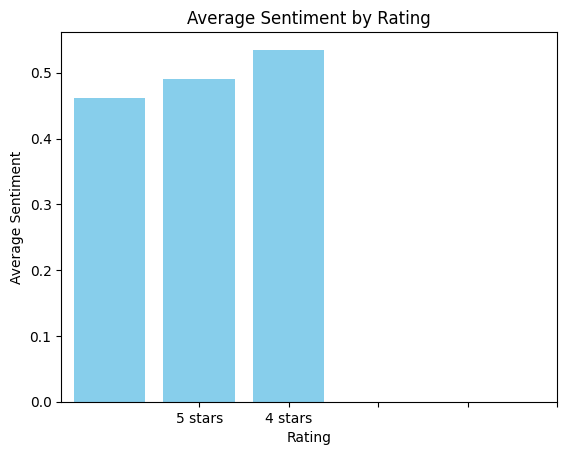

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(sentiment_vs['label'], sentiment_vs['score'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Rating')
plt.xticks(np.arange(1, 6, 1))
plt.show()